In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the dataset
train_path = 'food11/train'
test_path = 'food11/test'

# Set the image size and batch size for training and testing
img_size = (224, 224)
batch_size = 32

# Create a data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=50, validation_data=test_data, verbose = 2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.
Epoch 1/50
310/310 - 234s - loss: 2.3026 - accuracy: 0.1620 - val_loss: 2.1823 - val_accuracy: 0.2227 - 234s/epoch - 756ms/step
Epoch 2/50
310/310 - 240s - loss: 2.1738 - accuracy: 0.2385 - val_loss: 2.1073 - val_accuracy: 0.2718 - 240s/epoch - 775ms/step
Epoch 3/50
310/310 - 244s - loss: 2.0801 - accuracy: 0.2796 - val_loss: 2.0064 - val_accuracy: 0.2945 - 244s/epoch - 786ms/step
Epoch 4/50
310/310 - 241s - loss: 1.9871 - accuracy: 0.3203 - val_loss: 1.9561 - val_accuracy: 0.3527 - 241s/epoch - 778ms/step
Epoch 5/50
310/310 - 244s - loss: 1.8901 - accuracy: 0.3602 - val_loss: 1.8673 - val_accuracy: 0.3927 - 244s/epoch - 786ms/step
Epoch 6/50
310/310 - 241s - loss: 1.7776 - accuracy: 0.4002 - val_loss: 1.7919 - val_accuracy: 0.4255 - 241s/epoch - 778ms/step
Epoch 7/50
310/310 - 242s - loss: 1.6986 - accuracy: 0.4241 - val_loss: 1.8592 - val_accuracy: 0.3936 - 242s/epoch - 781ms/step
Epoch 8/50
310/310

KeyboardInterrupt: 

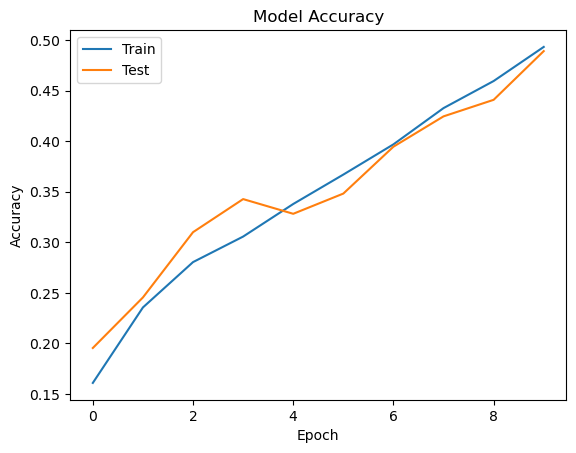

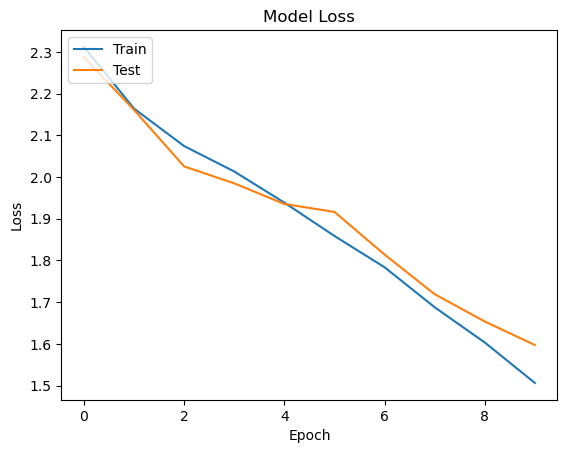

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
